In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [13]:
def plot_and_show_statistics(filename, bin_count):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Allocation Rate Distribution')
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[1], color='green')
    axs[1].set_title('Utilization Rate Distribution')
    
    plt.tight_layout()
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"

    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()

Allocation Rate Statistics:
count    251876.000000
mean         64.227398
std          13.409401
min           5.952380
25%          57.142900
50%          61.904800
75%          69.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    251876.000000
mean         26.172906
std           8.685013
min           1.674040
25%          20.241600
50%          24.634400
75%          29.384500
max          55.129200
Name: Utilization Rate, dtype: float64


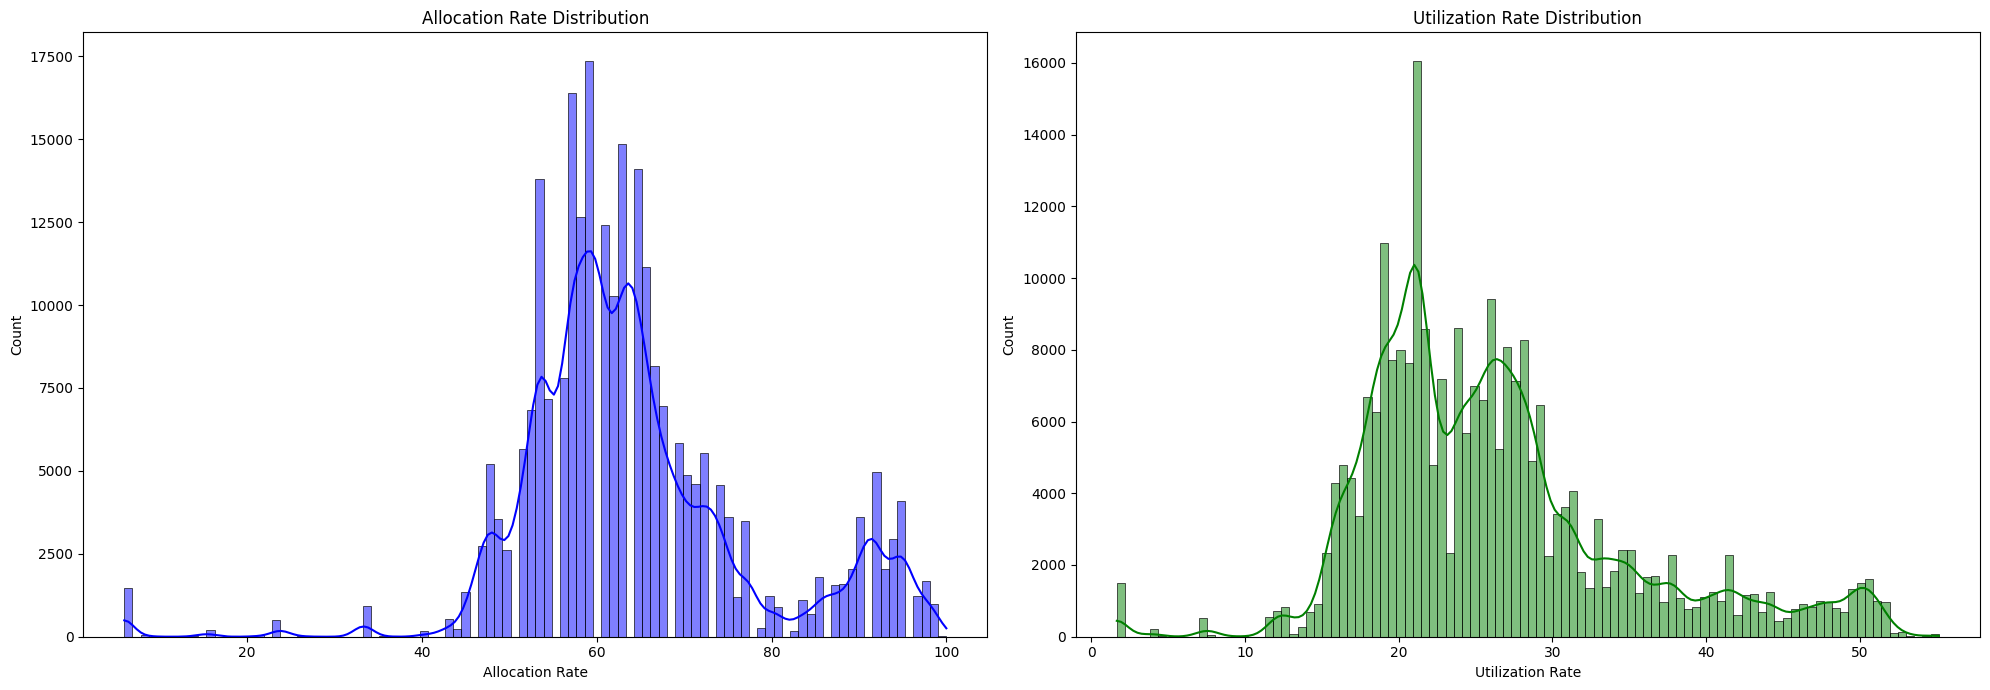

In [14]:
plot_and_show_statistics("compact_20240612_165903_server(14)_accelerator(84)_elapsed(251876)_flavor.result", 100)